**<font size='+3' color='green'> Support Vector Regression (SVR)</font>**

## Importing the libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [53]:
dset = pd.read_csv("Position_Salaries.csv")
X = dset.iloc[:, 1:-1].values
y = dset.iloc[:, -1].values

In [54]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [55]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [56]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [57]:
# StandardScalar class expects a 2-D array as input so we are converting y to a 2-D array
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [58]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [59]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [60]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [61]:
y_pred = svr.predict(sc_X.transform([[6.5]])).reshape(-1,1) # Converting to a 2-D array
print(y_pred)
# .reshape(-1, 1) reshapes the array to have 1 column and infers the number of rows
# automatically based on the total number of elements in the array.

[[-0.27861589]]


In [62]:
# Convert scaled y_pred to actual value
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[[170370.0204065]]


## Visualising the SVR results

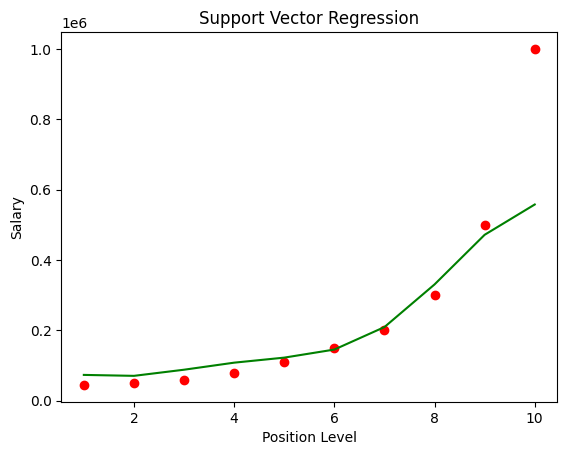

In [63]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr.predict(X).reshape(-1,1)), color='green')
plt.title("Support Vector Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-64-4a4d5cecd787>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


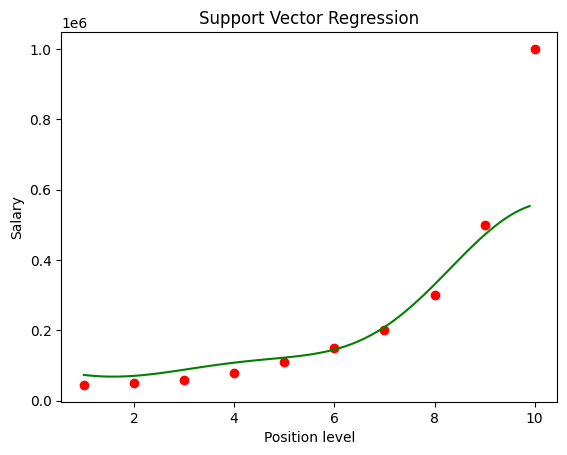

In [64]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(svr.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'green')
plt.title('Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()